In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from kmodes.kprototypes import KPrototypes
import joblib
from data_creation import data_for_clustering
import umap.umap_ as umap

In [ ]:
##### This notebook generates the MinMax scaler and the K-Prototypes model used for the prioritization clustering.
    ##### Every time this notebook generates the model the results must be checked to make sure the labels are properly assigned
    ##### in prioritized_corridors.csv, which is the data used in Power BI (this file is created in the model_prediction
    ##### notebook). This notebook provides code to graph several strip plots that can help check the results.
    ##### There's also code to perform a dimensionality reduction using UMAP and check the clusters visually in 2D

##### The methodology works by bringing 3-year data. Before running the script, the person who runs it can modify the date
    ##### information below (year, month, day) and the script would automatically bring the 3-year data up to such date
cluster_df = data_for_clustering(2022, 9, 30)
##### We could save the data to make prioritization predictions using the model_prediction notebook
#cluster_df.to_csv("raw_data_predict.csv", index = False)

##### We remove the corridors and the number of killed and injured vulnerable people to perform the clustering (the basic EDA
    ##### mentioned in the data_creation notebook revealed the number of killed and injured vulnerable people were redundant)
##### We normalize the continuous data 
cluster_df_norm = cluster_df[["HORARIO", "accidentes", "muertes", "heridos", "vulnerables"]].copy()

#del cluster_df

##### We scale the continuous features
scaler = preprocessing.MinMaxScaler()
cluster_df_norm[["accidentes", "muertes", "heridos"]] = scaler.fit_transform(cluster_df_norm[["accidentes", "muertes", \
    "heridos"]])

In [3]:
##### We apply the clustering

# We run the clustering 50 times
cost = []
clust = []
for i in range(50):
    
    kproto = KPrototypes(n_clusters = 3, init = "Cao")
    clusters = kproto.fit_predict(cluster_df_norm, categorical = [0, 4])
    
    # Save each model
    clust.append(kproto)
    # Save each model's cost
    cost.append(kproto.cost_)

# Transform the cost list into a numpy array
costArray = np.array(cost)

# Return the index from the smallest cost
minIndex = costArray.argmin()

# Retrieve the corresponding model and clusters
kproto = clust[minIndex]
clusters = kproto.fit_predict(cluster_df_norm, categorical = [0, 4])

del cost, costArray, clust

In [4]:
##### This is the code that helps check the clusters

cluster_df["CONSTANT"] = 0 # This is used to plot some strip plots with no x-label

cluster_df = pd.concat((cluster_df, pd.DataFrame(clusters)), axis = 1)
cluster_df.rename({0: "labels"}, axis = 1, inplace = True)

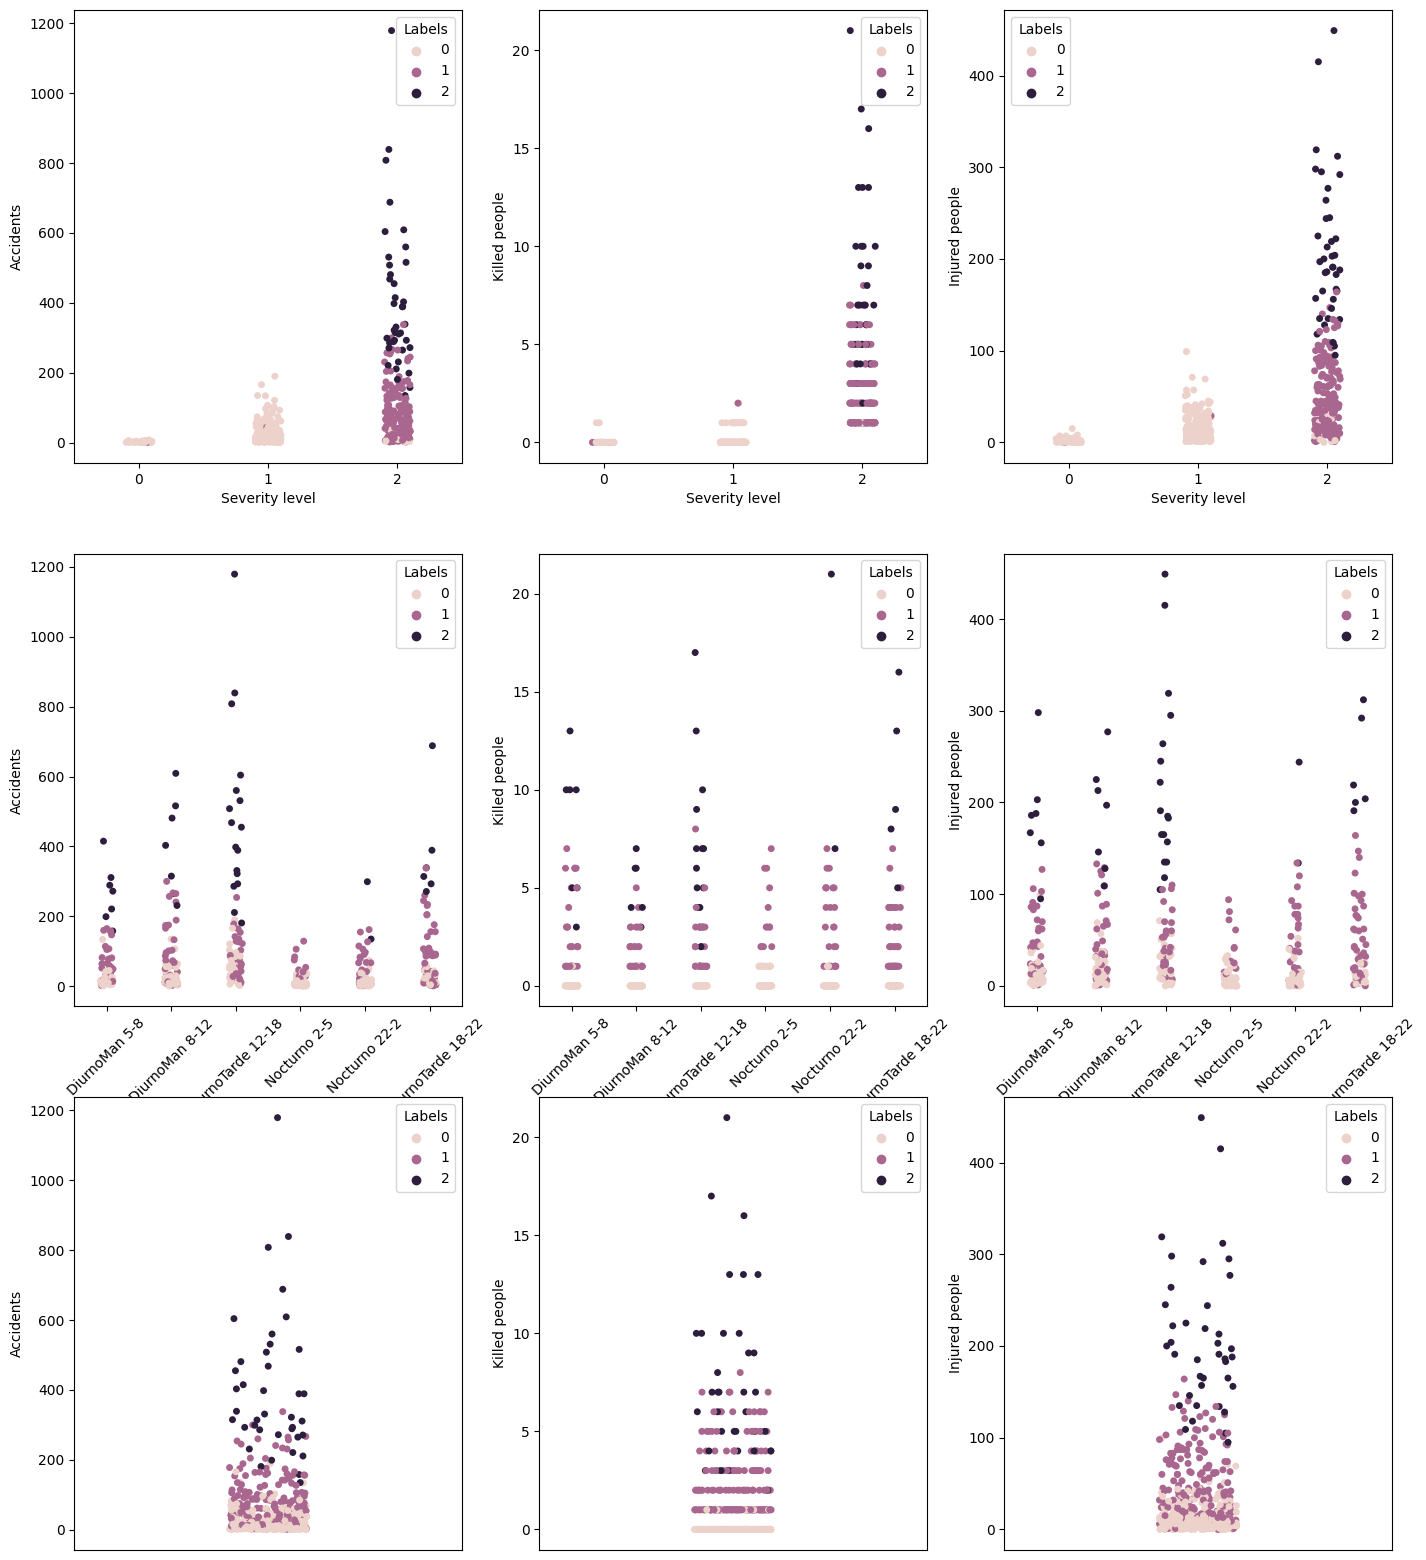

In [5]:
##### We plot the strip plots

fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (17, 20))

#Row 0 - column 0
sns.stripplot(x = "vulnerables", y = "accidentes", hue = "labels", ax = ax[0, 0], data = cluster_df)
ax[0, 0].set(xlabel = "Severity level", ylabel = "Accidents")
ax[0, 0].legend(title = "Labels")

# Row 0 - column 1
sns.stripplot(x = "vulnerables", y = "muertes", hue = "labels", ax = ax[0, 1], data = cluster_df)
ax[0, 1].set(xlabel = "Severity level", ylabel = "Killed people")
ax[0, 1].legend(title = "Labels")

# Row 0 - column 2
sns.stripplot(x = "vulnerables", y = "heridos", hue = "labels", ax = ax[0, 2], data = cluster_df)
ax[0, 2].set(xlabel = "Severity level", ylabel = "Injured people")
ax[0, 2].legend(title = "Labels")

# Row 1 - column 0
sns.stripplot(x = "HORARIO", y = "accidentes", hue = "labels", ax = ax[1, 0], data = cluster_df)
ax[1, 0].set(xlabel = "", ylabel = "Accidents")
ax[1, 0].tick_params(axis = 'x', rotation = 45)
ax[1, 0].legend(title = "Labels")

# Row 1 - column 1
sns.stripplot(x = "HORARIO", y = "muertes", hue = "labels", ax = ax[1, 1], data = cluster_df)
ax[1, 1].set(xlabel = "", ylabel = "Killed people")
ax[1, 1].tick_params(axis = 'x', rotation = 45)
ax[1, 1].legend(title = "Labels")

# Row 1 - column 2
sns.stripplot(x = "HORARIO", y = "heridos", hue = "labels", ax = ax[1, 2], data = cluster_df)
ax[1, 2].set(xlabel = "", ylabel = "Injured people")
ax[1, 2].tick_params(axis = 'x', rotation = 45)
ax[1, 2].legend(title = "Labels")

# Row 2 - column 0
sns.stripplot(x = "CONSTANT", y = "accidentes", hue = "labels", ax = ax[2, 0], data = cluster_df)
ax[2, 0].set(xlabel = "", ylabel = "Accidents")
ax[2, 0].set_xticks(())
ax[2, 0].legend(title = "Labels")

# Row 2 - column 1
sns.stripplot(x = "CONSTANT", y = "muertes", hue = "labels", ax = ax[2, 1], data = cluster_df)
ax[2, 1].set(xlabel = "", ylabel = "Killed people")
ax[2, 1].set_xticks(())
ax[2, 1].legend(title = "Labels")

# Row 2 - column 2
sns.stripplot(x = "CONSTANT", y = "heridos", hue = "labels", ax = ax[2, 2], data = cluster_df)
ax[2, 2].set(xlabel = "", ylabel = "Injured people")
ax[2, 2].set_xticks(())
ax[2, 2].legend(title = "Labels")

plt.show()

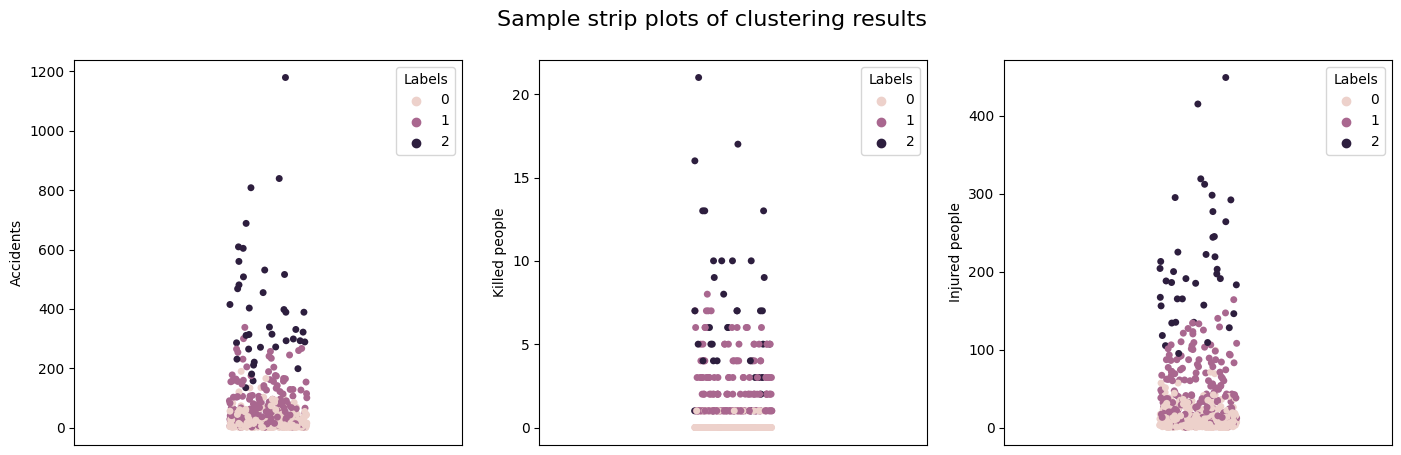

In [6]:
##### This is to plot the sample strip plots used in the README

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (17, 5))

# Column 0
sns.stripplot(x = "CONSTANT", y = "accidentes", hue = "labels", ax = ax[0], data = cluster_df)
ax[0].set(xlabel = "", ylabel = "Accidents")
ax[0].set_xticks(())
ax[0].legend(title = "Labels")

# Column 1
sns.stripplot(x = "CONSTANT", y = "muertes", hue = "labels", ax = ax[1], data = cluster_df)
ax[1].set(xlabel = "", ylabel = "Killed people")
ax[1].set_xticks(())
ax[1].legend(title = "Labels")

# Column 2
sns.stripplot(x = "CONSTANT", y = "heridos", hue = "labels", ax = ax[2], data = cluster_df)
ax[2].set(xlabel = "", ylabel = "Injured people")
ax[2].set_xticks(())
ax[2].legend(title = "Labels")

plt.suptitle("Sample strip plots of clustering results", fontsize = 16)
plt.show()

In [ ]:
##### This is the code to perform the dimensionality reduction
    ##### This code is adapted from: https://antonsruberts.github.io/kproto-audience/

##### Please note this assumes the clustering results were already analyzed. In this case, label 2 would be the highest
    ##### priority level, followed by label 1 and then by label 0
dictp = {0: "NA", 1: "Complementary", 2: "Prioritized"}
cluster_df["clusters"] = cluster_df["labels"].map(dictp)

cluster_df_umap = cluster_df[["HORARIO", "accidentes", "muertes", "heridos", "vulnerables"]].copy()
cluster_df_umap["HORARIO"] = cluster_df_umap["HORARIO"].astype("category")
cluster_df_umap["HORARIO"] = cluster_df_umap["HORARIO"].cat.codes.astype("category")

# Preprocessing numerical features
numerical = cluster_df_umap.select_dtypes(exclude = "category")

for c in numerical.columns:
    pt = preprocessing.PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
# Preprocessing categorical features
categorical = cluster_df_umap.select_dtypes(include = "category")
categorical = pd.get_dummies(categorical)

# Percentage of categorical features is used as weight parameter in embeddings later
categorical_weight = len(cluster_df_umap.select_dtypes(include = "category").columns) / cluster_df_umap.shape[1]

# Embedding numerical & categorical features
fit1 = umap.UMAP(metric = 'l2').fit(numerical)
fit2 = umap.UMAP(metric = 'dice').fit(categorical)

# Augmenting the numerical embedding with categorical embedding
intersection = umap.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight = categorical_weight)
intersection = umap.reset_local_connectivity(intersection)
embedding = umap.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1._initial_alpha, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                200, 'random', np.random, fit1.metric, 
                                                fit1._metric_kwds, False, densmap_kwds = {}, output_dens = False)

# We extract the embeddings for the UMAP plot
embedding_values = np.array([pd.DataFrame(v) for v in embedding])
umap_plot = embedding_values[0]

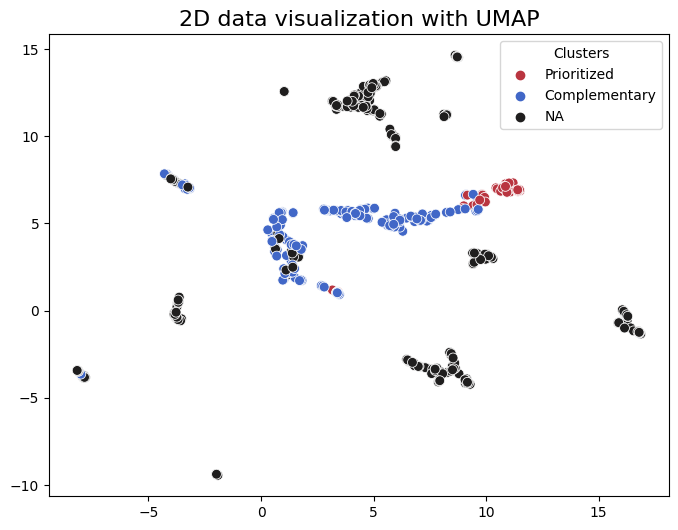

In [8]:
##### We plot the clusters in 2D

plt.figure(figsize = (8, 6))
sns.scatterplot(x = umap_plot[0], y = umap_plot[1],
                hue = cluster_df["clusters"],
                palette = "icefire",
                s = 50
)
handles, labels = plt.gca().get_legend_handles_labels()

# Note that the order list below is based on an initial visualization to check the order in which the legend shows the
    # clusters. The idea is to show the clusters in the legend according to the priority levels they represent, from the
    # highest to the lowest. The list might need to be modified since UMAP delivers different results each time is run.
order = [2, 0, 1]
plt.legend([handles[i] for i in order], [labels[i] for i in order], title = "Clusters")
plt.xlabel("")
plt.ylabel("")
plt.title("2D data visualization with UMAP", fontsize = 16)
plt.show()

In [ ]:
##### We save the scaler and the model

# Scaler
joblib.dump(scaler, "scaler.mod")

# Model
joblib.dump(kproto, "kprototypes.mod")